# CRUD Basico para Modelo de Supply_Forecast.



In [1]:
# LIBRERIAS NECESARIAS 
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import pyodbc
from dotenv import dotenv_values
import psycopg2 as pg2    # Conectores para Postgres
import getpass  # Para obtener el usuario del sistema operativo

# Mostrar el DataFrame resultante
import ace_tools_open as tools

# Evitar Mensajes Molestos
import warnings
warnings.simplefilter(action='ignore', category=UserWarning)
warnings.simplefilter(action='ignore', category= FutureWarning)

secrets = dotenv_values(".env")   # Connection String from .env
folder = secrets["FOLDER_DATOS"]

import uuid


### RUTINAS DEL CRUD

In [ ]:

# Funciones de conexión a la base de datos
def Open_Conn_Postgres():
    secrets = dotenv_values(".env")   # Cargar credenciales desde .env    
    conn_str = f"dbname={secrets['BASE4']} user={secrets['USUARIO4']} password={secrets['CONTRASENA4']} host={secrets['SERVIDOR4']} port={secrets['PUERTO4']}"
    try:    
        conn = pg2.connect(conn_str)
        return conn
    except Exception as e:
        print(f'Error en la conexión: {e}')
        return None

def Close_Connection(conn): 
    conn.close()
    return True

# Helper para generar identificadores únicos
def id_aleatorio():
    return str(uuid.uuid4())

# -----------------------------------------------------------
# 1. Operaciones CRUD para spl_supply_forecast_model
# (Ya se presentaron previamente, se incluye para completar el conjunto)
def create_model(active, description, method, name):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_model = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_model(
                id, active, description, method, name, "timestamp"
            )
            VALUES (%s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_model, active, description, method, name, timestamp))
        conn.commit()
        cur.close()
        return id_model
    except Exception as e:
        print(f"Error en create_model: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_model(model_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, active, description, method, name, "timestamp"
            FROM public.spl_supply_forecast_model
            WHERE id = %s
        """
        cur.execute(query, (model_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "active": row[1],
                "description": row[2],
                "method": row[3],
                "name": row[4],
                "timestamp": row[5]
            }
        return None
    except Exception as e:
        print(f"Error en get_model: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_model(model_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(model_id)
        query = f"""
            UPDATE public.spl_supply_forecast_model
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_model(model_id)
    except Exception as e:
        print(f"Error en update_model: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_model(model_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_model
            WHERE id = %s
        """
        cur.execute(query, (model_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_model: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 2. Operaciones CRUD para spl_supply_forecast_model_parameter
def create_model_parameter(data_type, default_value, is_public, is_public_required, is_required, name, supply_forecast_model_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_param = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_model_parameter(
                id, data_type, default_value, is_public, is_public_required, is_required, name, "timestamp", supply_forecast_model_id
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        
        print("Query: ", query)
        
        cur.execute(query, (id_param, data_type, default_value, is_public, is_public_required, is_required, name, timestamp, supply_forecast_model_id))
        conn.commit()
        cur.close()
        return id_param
    except Exception as e:
        print(f"Error en create_model_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_model_parameter(param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, data_type, default_value, is_public, is_public_required, is_required, name, "timestamp", supply_forecast_model_id
            FROM public.spl_supply_forecast_model_parameter
            WHERE id = %s
        """
        cur.execute(query, (param_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "data_type": row[1],
                "default_value": row[2],
                "is_public": row[3],
                "is_public_required": row[4],
                "is_required": row[5],
                "name": row[6],
                "timestamp": row[7],
                "supply_forecast_model_id": row[8]
            }
        return None
    except Exception as e:
        print(f"Error en get_model_parameter: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_model_parameter(param_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(param_id)
        query = f"""
            UPDATE public.spl_supply_forecast_model_parameter
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_model_parameter(param_id)
    except Exception as e:
        print(f"Error en update_model_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_model_parameter(param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_model_parameter
            WHERE id = %s
        """
        cur.execute(query, (param_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_model_parameter: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 3. Operaciones CRUD para spl_supply_forecast_execution
def create_execution(description, name, supply_forecast_model_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_execution = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution(
                id, description, name, "timestamp", supply_forecast_model_id
            )
            VALUES (%s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_execution, description, name, timestamp, supply_forecast_model_id))
        conn.commit()
        cur.close()
        return id_execution
    except Exception as e:
        print(f"Error en create_execution: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution(execution_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, description, name, "timestamp", supply_forecast_model_id
            FROM public.spl_supply_forecast_execution
            WHERE id = %s
        """
        cur.execute(query, (execution_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "description": row[1],
                "name": row[2],
                "timestamp": row[3],
                "supply_forecast_model_id": row[4]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution(execution_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause =  ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(execution_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution(execution_id)
    except Exception as e:
        print(f"Error en update_execution: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution(execution_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution
            WHERE id = %s
        """
        cur.execute(query, (execution_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 4. Operaciones CRUD para spl_supply_forecast_execution_parameter
def create_execution_parameter(supply_forecast_execution_id, supply_forecast_model_parameter_id, value):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_exec_param = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_parameter(
                id, "timestamp", supply_forecast_execution_id, supply_forecast_model_parameter_id, value
            )
            VALUES (%s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_exec_param, timestamp, supply_forecast_execution_id, supply_forecast_model_parameter_id, value))
        conn.commit()
        cur.close()
        return id_exec_param
    except Exception as e:
        print(f"Error en create_execution_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_parameter(exec_param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, "timestamp", supply_forecast_execution_id, supply_forecast_model_parameter_id, value
            FROM public.spl_supply_forecast_execution_parameter
            WHERE id = %s
        """
        cur.execute(query, (exec_param_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "timestamp": row[1],
                "supply_forecast_execution_id": row[2],
                "supply_forecast_model_parameter_id": row[3],
                "value": row[4]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_parameter: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_parameter(exec_param_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause =  ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(exec_param_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_parameter
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_parameter(exec_param_id)
    except Exception as e:
        print(f"Error en update_execution_parameter: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_parameter(exec_param_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_parameter
            WHERE id = %s
        """
        cur.execute(query, (exec_param_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_parameter: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 5. Operaciones CRUD para spl_supply_forecast_execution_execute
def create_execution_execute(end_execution, last_execution, start_execution, supply_forecast_execution_id, supply_forecast_execution_schedule_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_exec = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_execute(
                id, end_execution, last_execution, start_execution, "timestamp", supply_forecast_execution_id, supply_forecast_execution_schedule_id
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_exec, end_execution, last_execution, start_execution, timestamp, supply_forecast_execution_id, supply_forecast_execution_schedule_id))
        conn.commit()
        cur.close()
        return id_exec
    except Exception as e:
        print(f"Error en create_execution_execute: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_execute(exec_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, end_execution, last_execution, start_execution, "timestamp", supply_forecast_execution_id, supply_forecast_execution_schedule_id
            FROM public.spl_supply_forecast_execution_execute
            WHERE id = %s
        """
        cur.execute(query, (exec_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "end_execution": row[1],
                "last_execution": row[2],
                "start_execution": row[3],
                "timestamp": row[4],
                "supply_forecast_execution_id": row[5],
                "supply_forecast_execution_schedule_id": row[6]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_execute: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_execute(exec_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(exec_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_execute
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_execute(exec_id)
    except Exception as e:
        print(f"Error en update_execution_execute: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_execute(exec_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_execute
            WHERE id = %s
        """
        cur.execute(query, (exec_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_execute: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 6. Operaciones CRUD para spl_supply_forecast_execution_execute_result
def create_execution_execute_result(confidence_level, error_margin, expected_demand, lower_bound, upper_bound, product_id, site_id, supply_forecast_execution_execute_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_result = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_execute_result(
                id, confidence_level, error_margin, expected_demand, average_daily_demand, lower_bound, "timestamp", upper_bound, 
                product_id, site_id, supply_forecast_execution_execute_id, algorithm, average, ext_product_code, ext_site_code, ext_supplier_code, 
                forcast, graphic, quantity_stock, sales_last, sales_previous, sales_same_year, supplier_id, windows, 
                deliveries_pending
            )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        """
        cur.execute(query, (id_result, confidence_level, error_margin, expected_demand, lower_bound, timestamp, upper_bound, product_id, site_id, supply_forecast_execution_execute_id))
        conn.commit()
        cur.close()
        return id_result
    except Exception as e:
        print(f"Error en create_execution_execute_result: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_execute_result(result_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, confidence_level, error_margin, expected_demand, average_daily_demand, lower_bound, "timestamp", upper_bound, 
                product_id, site_id, supply_forecast_execution_execute_id, algorithm, average, ext_product_code, ext_site_code, ext_supplier_code, 
                forcast, graphic, quantity_stock, sales_last, sales_previous, sales_same_year, supplier_id, windows, 
                deliveries_pending
            FROM public.spl_supply_forecast_execution_execute_result
            WHERE id = %s
        """
        cur.execute(query, (result_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "confidence_level": row[1],
                "error_margin": row[2],
                "expected_demand": row[3],
                "lower_bound": row[4],
                "timestamp": row[5],
                "upper_bound": row[6],
                "product_id": row[7],
                "site_id": row[8],
                "supply_forecast_execution_execute_id": row[9]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_execute_result: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_execute_result(result_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(result_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_execute_result
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_execute_result(result_id)
    except Exception as e:
        print(f"Error en update_execution_execute_result: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_execute_result(result_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_execute_result
            WHERE id = %s
        """
        cur.execute(query, (result_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_execute_result: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 7. Operaciones CRUD para spl_supply_forecast_execution_schedule
def create_execution_schedule(supply_forecast_execution_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_schedule = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_schedule(
                id, "timestamp", supply_forecast_execution_id
            )
            VALUES (%s, %s, %s)
        """
        cur.execute(query, (id_schedule, timestamp, supply_forecast_execution_id))
        conn.commit()
        cur.close()
        return id_schedule
    except Exception as e:
        print(f"Error en create_execution_schedule: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_schedule(schedule_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, "timestamp", supply_forecast_execution_id
            FROM public.spl_supply_forecast_execution_schedule
            WHERE id = %s
        """
        cur.execute(query, (schedule_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "timestamp": row[1],
                "supply_forecast_execution_id": row[2]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_schedule: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_schedule(schedule_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(schedule_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_schedule
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_schedule(schedule_id)
    except Exception as e:
        print(f"Error en update_execution_schedule: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_schedule(schedule_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_schedule
            WHERE id = %s
        """
        cur.execute(query, (schedule_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_schedule: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)

# -----------------------------------------------------------
# 8. Operaciones CRUD para spl_supply_forecast_execution_execute_log
def create_execution_execute_log(supply_forecast_execution_execute_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        id_log = id_aleatorio()
        timestamp = datetime.utcnow()
        query = """
            INSERT INTO public.spl_supply_forecast_execution_execute_log(
                id, "timestamp", supply_forecast_execution_execute_id
            )
            VALUES (%s, %s, %s)
        """
        cur.execute(query, (id_log, timestamp, supply_forecast_execution_execute_id))
        conn.commit()
        cur.close()
        return id_log
    except Exception as e:
        print(f"Error en create_execution_execute_log: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def get_execution_execute_log(log_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        query = """
            SELECT id, "timestamp", supply_forecast_execution_execute_id
            FROM public.spl_supply_forecast_execution_execute_log
            WHERE id = %s
        """
        cur.execute(query, (log_id,))
        row = cur.fetchone()
        cur.close()
        if row:
            return {
                "id": row[0],
                "timestamp": row[1],
                "supply_forecast_execution_execute_id": row[2]
            }
        return None
    except Exception as e:
        print(f"Error en get_execution_execute_log: {e}")
        return None
    finally:
        Close_Connection(conn)

def update_execution_execute_log(log_id, **kwargs):
    conn = Open_Conn_Postgres()
    if conn is None:
        return None
    try:
        cur = conn.cursor()
        set_clause = ", ".join([f"{key} = %s" for key in kwargs.keys()])
        values = list(kwargs.values())
        values.append(log_id)
        query = f"""
            UPDATE public.spl_supply_forecast_execution_execute_log
            SET {set_clause}
            WHERE id = %s
        """
        cur.execute(query, tuple(values))
        conn.commit()
        cur.close()
        return get_execution_execute_log(log_id)
    except Exception as e:
        print(f"Error en update_execution_execute_log: {e}")
        conn.rollback()
        return None
    finally:
        Close_Connection(conn)

def delete_execution_execute_log(log_id):
    conn = Open_Conn_Postgres()
    if conn is None:
        return False
    try:
        cur = conn.cursor()
        query = """
            DELETE FROM public.spl_supply_forecast_execution_execute_log
            WHERE id = %s
        """
        cur.execute(query, (log_id,))
        conn.commit()
        cur.close()
        return True
    except Exception as e:
        print(f"Error en delete_execution_execute_log: {e}")
        conn.rollback()
        return False
    finally:
        Close_Connection(conn)


### MODELO DE DATOS
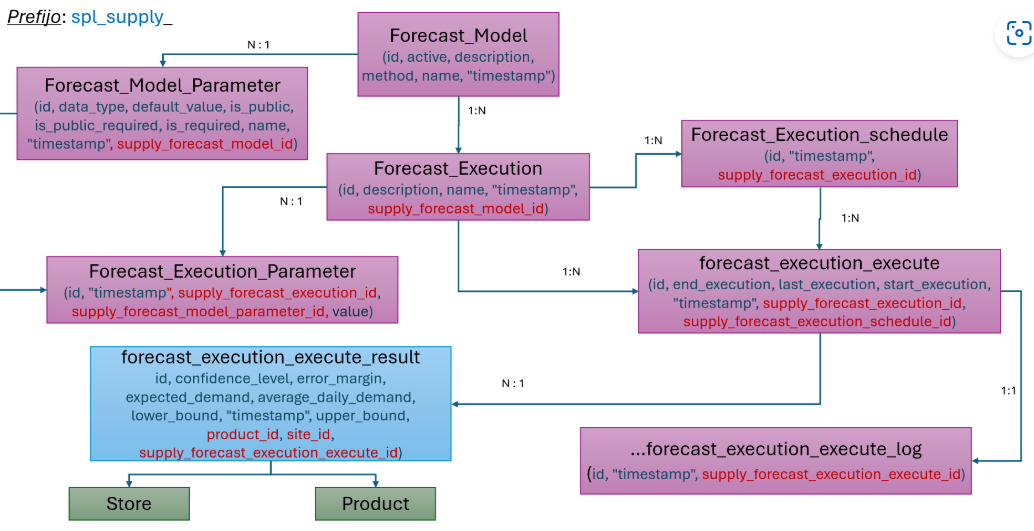

### DATOS


In [ ]:
planificador = [
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_05"},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_01", "f1": 90, "f2": 10, "f3": 20},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_04", "f1": 0.6},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_02"},
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS", "ventana": 30, "algoritmo" : "ALGO_03", "f1": 12, "f2": "add", "f3": "add"},
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA", "ventana": 30, "algoritmo"  :  "ALGO_05"},
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA", "ventana": 30, "algoritmo"  :  "ALGO_02"},
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA", "ventana": 30, "algoritmo"  :   "ALGO_01", "f1": 80, "f2": 10, "f3": 20},
    
    {"id": 62, "nombre": "ARCOR","label":"62_ARCOR", "label": "62_ARCOR", "ventana": 30, "algoritmo" : "ALGO_05"},
    
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_01", "f1": 70, "f2": 10, "f3": 20},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_02"},    
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_03", "f1": 12, "f2": "add", "f3": "add"},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_04", "f1": 0.6},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_05"},
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA", "ventana": 50, "algoritmo" : "ALGO_06"},

   {"id": 140, "nombre": "UNILEVER DE ARGENTINA S.A.", "label": "140_UNILEVER", "ventana": 30, "algoritmo" : "ALGO_05"},
    
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_05"},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_06"},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_01", "f1": 100, "f2": 10, "f3": 10},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_04", "f1": 0.3},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_03", "f1": 7, "f2": "add", "f3": "add"},
   {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ", "ventana": 50, "algoritmo" : "ALGO_02"},

    {"id": 1465, "nombre": "QUICKFOOD S.A.", "label":"1465_QUICKFOOD", "ventana": 30, "algoritmo" : "ALGO_05"},
    
    {"id": 327, "nombre": "PALADINI S.A.", "label":"327_PALADINI", "ventana": 30, "algoritmo" : "ALGO_05"}
]

forecast_model =[
    # {"method": "ALGO_01", "description":"* Toma como base de cálculo el Período Actual de la Ventana de Reposición Definida. * El mismo período del mes anterior y * El mismo período del año anterior.  * Con los 3 valores hace un promedio simple ponderado",
    #  "name" :"Promedio Ponderado de Ventas de Periodos Anteriores factores (Actual, Anterior y Año Anterior)"},
    # {"method": "ALGO_02", "description":"usa regresión lineal múltiple para estimar la demanda futura en función de variables de ventas pasadas:",
    #  "name" :"Modelo de Regresión Lineal Doble considera  Tendencia (Holt)"},
    # {"method": "ALGO_03", "description":"El modelo HOLT WINTER  considera un valor típico (promedio), una pendiente (tendencia) a lo largo del tiempo y un patrón cíclico repetitivo (estacionalidad)",
    #  "name" :"Modelos Regresión Lineal Triple, Considera Estacionalidad y Tendencia (Holt-Winters)"},
    # {"method": "ALGO_04", "description":"El suavizado exponencial se refiere al uso de una media móvil ponderada exponencialmente (EWMA) para suavizar una serie temporal. El objetivo es identificar los 3 componentes de las series temporales.",
    #  "name" :"Modelo de Media Movil Exponencial Ponderada (EWMA) - SUAVIZADO EXPONENCIAL"},
    # {"method": "ALGO_05", "description":"Por lo relevado con los compradores es la forma en la que hoy compran. Toman la venta de los últimos 30 dias, la ven separada en 2 quincenas Se ecluyen del cálculo productos que no hayan tenido ventas en las últimas 2 ventanas",
    #  "name" :"Modelo PROMEDIO de VENTA SIMPLE - Promedio de Venta (PVS)"},
    {"method": "ALGO_06", "description":"Regresión Lineal DOBLE (HOLT) Sobre Períodos de Venta Semanales. Necesita Mínimo 4 períodos semanales para estimas",
     "name" :"Modelo de Regreción Lineal HOLT(Tendencia) Semanal"}
]

forecast_model_parameter =[
    #{"algoritmo": "ALGO_01", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    #{"algoritmo": "ALGO_01", "name":"2_Factor_Actual", "data_type": "float", "default_value": 0.80, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    #{"algoritmo": "ALGO_01", "name":"3_Factor_Previo", "data_type": "float", "default_value": 0.10, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    #{"algoritmo": "ALGO_01", "name":"4_Factor_Año_Anterior", "data_type": "float", "default_value": 0.10, "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    
    #{"algoritmo": "ALGO_02", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "e18f1f14-993f-483a-a3d9-0c6d33b65d9d"},
    
    #{"algoritmo": "ALGO_03", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    #{"algoritmo": "ALGO_03", "name":"2_Periodos_Estacionalidad", "data_type": "int", "default_value": 7, "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    #{"algoritmo": "ALGO_03", "name":"3_Efecto_Tendencia", "data_type": "str", "default_value": "add", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    #{"algoritmo": "ALGO_03", "name":"4_Efecto_Estacionalidad", "data_type": "str", "default_value": "add", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    
    #{"algoritmo": "ALGO_04", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    #{"algoritmo": "ALGO_04", "name":"2_Factor_Alpha", "data_type": "float", "default_value": 0.6, "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    
    #{"algoritmo": "ALGO_05", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},  
    {"algoritmo": "ALGO_06", "name":"1_Window", "data_type": "int", "default_value": 30, "forecast_model_id": "3aa89ac6-284c-4ba0-aea0-48dff2b500c9"}  
    
]

forecast_excecution = [
    
    {"description": "id: 20, label:20_MOLINOS, ventana: 30, algoritmo : ALGO_01, f1: 90, f2: 10, f3: 20", "name":"20_MOLINOS_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"description": "id: 25, label:25_LA_VIRGINIA, ventana: 30, algoritmo : ALGO_01, f1: 80, f2: 10, f3: 20", "name":"25_LA_VIRGINIA_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_01, f1: 100, f2: 10, f3: 10", "name":"189_BODEGAS_LOPEZ_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_01, f1: 70, f2: 10, f3: 20", "name":"98_FRATELLI_BRANCA_ALGO_01", "forecast_model_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
        
    {"description": "id: 25, label:25_LA_VIRGINIA, ventana: 30, algoritmo : ALGO_02", "name": "25_LA_VIRGINIA_ALGO_02", "forecast_model_id": "e18f1f14-993f-483a-a3d9-0c6d33b65d9d"},
    
    {"description": "id: 456, label:456_LA_VIRGINIA, ventana: 30, algoritmo  : ALGO_03, f1: 70, f2: add, f3: add", "name": "456_LA_VIRGINIA_ALGO_03", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_03, f1: 12, f2: add, f3: add", "name": "98_FRATELLI_BRANCA_ALGO_03", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_03, f1: 7, f2: add, f3: add", "name": "189_BODEGAS_LOPEZ_ALGO_03", "forecast_model_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},

    {"description": "id: 20, label:20_MOLINOS, ventana: 30, algoritmo : ALGO_04, f1: 0.6", "name": "20_MOLINOS_ALGO_04", "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_04, f1: 0.6", "name": "98_FRATELLI_BRANCA_ALGO_04", "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},    
    {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_04, f1: 0.3", "name": "189_BODEGAS_LOPEZ_ALGO_04", "forecast_model_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    
    {"description": "id: 20, label:20_MOLINOS, ventana: 30, algoritmo : ALGO_05", "name": "20_MOLINOS_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    {"description": "id: 25, label:25_LA_VIRGINIA, ventana: 30, algoritmo : ALGO_05", "name": "25_LA_VIRGINIA_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    {"description": "id: 62, label:62_ARCOR, label 62_ARCOR, ventana: 30, algoritmo : ALGO_05", "name": "62_ARCOR_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_05", "name": "98_FRATELLI_BRANCA_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    {"description": "id: 140, label:140_UNILEVER, ventana: 30, algoritmo : ALGO_05", "name": "140_UNILEVER_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},    
    {"description": "id: 189, label:189_BODEGAS_LOPEZ, ventana: 30, algoritmo : ALGO_05","name": "189_BODEGAS_LOPEZ_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    {"description": "id: 327, label:327_PALADINI, ventana: 30, algoritmo : ALGO_05", "name": "327_PALADINI_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},
    {"description": "id: 1465, label:1465_QUICKFOOD, ventana: 30, algoritmo : ALGO_05", "name": "1465_QUICKFOOD_ALGO_05", "forecast_model_id": "96f4dafb-258a-487f-93f2-dd20954c1958"},

    {"description": "id: 98, label:98_FRATELLI_BRANCA, ventana: 50, algoritmo : ALGO_06", "name": "98_FRATELLI_BRANCA_ALGO_05", "forecast_model_id": "3aa89ac6-284c-4ba0-aea0-48dff2b500c9"}   
]   

forecast_excecution_parameter =[
    {"algoritmo": "ALGO_01", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"algoritmo": "ALGO_01", "name":"2_Factor_Actual", "supply_forecast_model_parameter_id": "float", "value": 0.80, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"algoritmo": "ALGO_01", "name":"3_Factor_Previo", "supply_forecast_model_parameter_id": "float", "value": 0.10, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    {"algoritmo": "ALGO_01", "name":"4_Factor_Año_Anterior", "supply_forecast_model_parameter_id": "float", "value": 0.10, "forecast_excecution_id": "6a84b864-a805-46dd-83ab-dfcb6f82badb"},
    
    {"algoritmo": "ALGO_02", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "e18f1f14-993f-483a-a3d9-0c6d33b65d9d"},
    
    {"algoritmo": "ALGO_03", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"algoritmo": "ALGO_03", "name":"2_Periodos_Estacionalidad", "supply_forecast_model_parameter_id": "int", "value": 7, "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"algoritmo": "ALGO_03", "name":"3_Efecto_Tendencia", "supply_forecast_model_parameter_id": "str", "value": "add", "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    {"algoritmo": "ALGO_03", "name":"4_Efecto_Estacionalidad", "supply_forecast_model_parameter_id": "str", "value": "add", "forecast_excecution_id": "743a0e90-c75b-48b1-8e82-2f70e739568b"},
    
    {"algoritmo": "ALGO_04", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    {"algoritmo": "ALGO_04", "name":"2_Factor_Alpha", "supply_forecast_model_parameter_id": "float", "value": 0.6, "forecast_excecution_id": "6153e8e7-67d3-46b2-adaf-539ee62be5b8"},
    
    {"algoritmo": "ALGO_05", "name":"1_Window", "supply_forecast_model_parameter_id": "int", "value": 30, "forecast_excecution_id": "96f4dafb-258a-487f-93f2-dd20954c1958"}      
]

In [7]:
conn =Open_Conn_Postgres()

query = """
SELECT table_schema, table_name 
FROM information_schema.tables 
WHERE table_name = 'spl_supply_forecast_model_parameter';
"""

  # Ejecutar la consulta SQL
datos = pd.read_sql(query, conn)

datos.head()

,table_schema,table_name
0,public,spl_supply_forecast_model_parameter


In [ ]:
# Ingresar FORECAST_MODEL

for record in forecast_model:
    create_model('TRUE', record["description"], record["method"], record["name"] )
    print (record["description"], record["method"], record["name"]) 
    print("-------------------")
    

In [ ]:
# Leer Dataframe de los FORECAST MODELS

conn =Open_Conn_Postgres()

query = """
SELECT id, active, description, method, name, "timestamp"
FROM public.spl_supply_forecast_model;
"""

  # Ejecutar la consulta SQL
modelos = pd.read_sql(query, conn)

modelos.head()

In [ ]:
# Ingresar MODEL_PARAMETER

for record in forecast_model_parameter:
    create_model_parameter(record["data_type"], record["default_value"], 'TRUE', 'TRUE', 'TRUE', record["name"], record["forecast_model_id"])  
    print(record["data_type"], record["default_value"], 'TRUE', 'TRUE', 'TRUE', record["name"], record["forecast_model_id"]) 
    print('------------------------------------------------------------------')
    

In [ ]:
# Ingresar FORECAST_EXECUTION

for record in forecast_excecution:
    create_execution(record["description"], record["name"], record["forecast_model_id"])
    print(record["description"], record["name"], record["forecast_model_id"]) 
    print('------------------------------------------------------------------')


In [ ]:
# Ingresar FORECAST_EXECUTION_PARAMETER

conn =Open_Conn_Connexa()
cur = conn.cursor()
query = """
-- Insertar registros generando el UUID en la sentencia
INSERT INTO public.spl_supply_forecast_execution_parameter (
    id,
    "timestamp",
    supply_forecast_execution_id,
    supply_forecast_model_parameter_id,
    value
)

SELECT
	uuid_generate_v4(),      -- Genera un UUID por cada fila
    fe."timestamp",          -- Toma el valor del timestamp de la tabla Forecast_Execution (o puede usarse now() )
    fe.id AS supply_forecast_execution_id,
    fmp.id AS supply_forecast_model_parameter_id,
    fmp.default_value AS value
FROM public.spl_supply_forecast_execution fe
JOIN public.spl_supply_forecast_model_parameter fmp
    ON fe.supply_forecast_model_id = fmp.supply_forecast_model_id;
"""
cur.execute(query)
conn.commit()
cur.close()


### CALCULAR Datos Complementarios FORECAST EXCECUTION

In [2]:
lista_prov = [
    {"id": 20, "nombre": "MOLINOS RIO DE LA PLATA", "label": "20_MOLINOS"},   
    {"id": 25, "nombre": "CAFES LA VIRGINIA S.A.", "label": "25_LA_VIRGINIA"},     
    {"id": 62, "nombre": "ARCOR","label":"62_ARCOR", "label": "62_ARCOR"},    
    {"id": 98, "nombre": "FRATELLI BRANCA DESTILERIAS S.A.", "label": "98_FRATELLI_BRANCA"},
    {"id": 140, "nombre": "UNILEVER DE ARGENTINA S.A.", "label": "140_UNILEVER"},    
    {"id": 189, "nombre": "BODEGAS Y VIÑEDOS LOPEZ S.A.I.C.", "label": "189_BODEGAS_LOPEZ"},
    {"id": 1465, "nombre": "QUICKFOOD S.A.", "label":"1465_QUICKFOOD"},    
    {"id": 327, "nombre": "PALADINI S.A.", "label":"327_PALADINI"}
]

In [3]:
id_proveedor = '189'
name= '189_BODEGAS_LOPEZ'
label = '189_BODEGAS_LOPEZ_ALGO_05'

# Recuperar Historial de Ventas
df_ventas = pd.read_csv(f'{folder}/{name}_Ventas.csv')
df_ventas['Codigo_Articulo']= df_ventas['Codigo_Articulo'].astype(int)
df_ventas['Sucursal']= df_ventas['Sucursal'].astype(int)
df_ventas['Fecha']= pd.to_datetime(df_ventas['Fecha'])

# Recuperar Maestro de Artículos
df_articulos = pd.read_csv(f'{folder}/{name}_Articulos.csv')
#articulos.head()

print(f"-> Datos Recuperados del CACHE: {id_proveedor}, Label: {name}")

-> Datos Recuperados del CACHE: 189, Label: 189_BODEGAS_LOPEZ


In [4]:
# Mostrar la tabla con los gráficos en base64

tools.display_dataframe_to_user(name="Ventas", dataframe=df_ventas)

Ventas


In [ ]:
# Leer Dataframe de los SUPPLIERS

conn =Open_Conn_Postgres()

query = """
SELECT id, address, city, country, ext_code, name, state, tax_identification, "timestamp", zip_code, supplier_status_id
FROM public.fnd_supplier
WHERE ext_code IN ('20', '25', '62', '98', '140', '189', '1465', '327');

"""

  # Ejecutar la consulta SQL
suppliers = pd.read_sql(query, conn)

suppliers.head()


,id,address,city,country,ext_code,name,state,tax_identification,timestamp,zip_code,supplier_status_id
0,1b76764e-334b-45df-abc7-526b1c6da5fa,None,None,None,140,UNILEVER DE ARGENTINA S.A. ...,None,30-50109269-6,2024-10-09 16:31:08.487,None,23a92ea4-423a-43f0-9fab-efacef4a574e
1,6e44e060-64b8-4562-a2e1-5874c6390466,None,None,None,1465,QUICKFOOD S.A. ...,None,30-50413188-9,2024-10-09 16:31:08.487,None,23a92ea4-423a-43f0-9fab-efacef4a574e
2,8e6e66f7-2482-451b-a656-5a1999343186,None,None,None,189,BODEGAS Y VIÃEDOS LOPEZ S.A.I.C. ...,None,30-55033224-4,2024-10-09 16:31:08.487,None,23a92ea4-423a-43f0-9fab-efacef4a574e
3,f006a0c2-6da6-46d6-b014-a6de03cd522c,None,None,None,20,MOLINOS RIO DE LA PLATA S.A ...,None,30-50085862-8,2024-10-09 16:31:08.487,None,23a92ea4-423a-43f0-9fab-efacef4a574e
4,8a99b126-1a87-4ae9-86ce-5411ba14e4e4,None,None,None,25,CAFES LA VIRGINIA S.A. ...,None,30-50107713-1,2024-10-09 16:31:08.487,None,23a92ea4-423a-43f0-9fab-efacef4a574e


: 

In [ ]:
# Actualizar los ID de los proveedores

query = """
UPDATE public.spl_supply_forecast_execution AS sfe
SET supplier_id = fs.id
FROM public.fnd_supplier AS fs
WHERE sfe.ext_supplier_code = fs.ext_code;

"""

In [ ]:
    # Selección del algoritmo de predicción
match algorithm:
    case 'ALGO_01':
        return Procesar_ALGO_01(data, id_proveedor, lbl_proveedor, period_lengh, current_date, f1, f2, f3)  # Promedio Ponderado x 3 Factores
    case 'ALGO_02':
        return Procesar_ALGO_02(data, id_proveedor, lbl_proveedor, period_lengh, current_date) # Doble Exponencial - Modelo Holt (Tendencia)
    case 'ALGO_03':
        return Procesar_ALGO_03(data, id_proveedor, lbl_proveedor, period_lengh, current_date, f1, f2, f3) # Triple Exponencial Holt-WInter (Tendencia + Estacionalidad) (periodos, add, add)
    case 'ALGO_04':
        return Procesar_ALGO_04(data, id_proveedor, lbl_proveedor, period_lengh, current_date, f1) # EWMA con Factor alpha
    case 'ALGO_05':
        return Procesar_ALGO_05(data, id_proveedor, lbl_proveedor, period_lengh, current_date) # Promedio Venta Simple en Ventana
    case _:
        raise ValueError(f"Error: El algoritmo '{algorithm}' no está implementado.")

### EJECUCIÓN

In [ ]:
# -----------------------------------------------------------
# Ejemplo de uso (se recomienda adaptar y expandir según las necesidades)
if __name__ == '__main__':
    # Ejemplo para spl_supply_forecast_model_parameter
    model_id = create_model(True, "Modelo de ejemplo", "Método A", "Modelo 1")
    if model_id:
        param_id = create_model_parameter("int", "0", True, False, True, "Parámetro 1", model_id)
        print("Parámetro del modelo creado con ID:", param_id)
        parametro = get_model_parameter(param_id)
        print("Datos del parámetro obtenido:", parametro)
        parametro_actualizado = update_model_parameter(param_id, default_value="10")
        print("Parámetro actualizado:", parametro_actualizado)
        if delete_model_parameter(param_id):
            print("Parámetro eliminado correctamente.")
    
    # Ejemplo para spl_supply_forecast_execution y sus dependencias
    execution_id = create_execution("Ejecución de ejemplo", "Ejecución 1", model_id)
    if execution_id:
        exec_param_id = create_execution_parameter(execution_id, param_id, "25")
        print("Parámetro de ejecución creado con ID:", exec_param_id)
    
        # Crear un schedule para la ejecución
        schedule_id = create_execution_schedule(execution_id)
        print("Schedule creado con ID:", schedule_id)
    
        # Crear una ejecución execute asociada al schedule
        exec_execute_id = create_execution_execute(datetime.utcnow(), datetime.utcnow(), datetime.utcnow(), execution_id, schedule_id)
        print("Ejecución execute creada con ID:", exec_execute_id)
    
        # Crear un log para la ejecución execute
        log_id = create_execution_execute_log(exec_execute_id)
        print("Log de ejecución creado con ID:", log_id)
    
        # Crear un resultado para la ejecución execute
        result_id = create_execution_execute_result(0.95, 0.05, 100, 90, 110, "Prod123", "SiteABC", exec_execute_id)
        print("Resultado de ejecución creado con ID:", result_id)
    
